<a href="https://colab.research.google.com/github/jeffheaton/present/blob/master/WUSTL/CABI-Demand/demand_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Washington University [Olin School of Business](https://olin.wustl.edu/EN-US/Pages/default.aspx)
[Center for Analytics and Business Insights](https://olin.wustl.edu/EN-US/Faculty-Research/research-centers/center-analytics-business-insights/Pages/default.aspx) (CABI)  
[Deep Learning for Demand Forecasting](https://github.com/jeffheaton/present/tree/master/WUSTL/CABI-Demand)  
Copyright 2022 by [Jeff Heaton](https://www.youtube.com/c/HeatonResearch), Released under [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) 

# Exploratory Data Analysis (EDA)

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


In [ ]:
import pandas as pd
import os

PATH = "/content/drive/MyDrive/projects/demand/"

df_sales = pd.read_csv(os.path.join(PATH,"sales_train.csv"))
df_items = pd.read_csv(os.path.join(PATH,"items.csv"))
df_resturant = pd.read_csv(os.path.join(PATH,"resturants.csv"))

df_sales.date = pd.to_datetime(df_sales.date, errors='coerce') 
df_sales['weekday'] = df_sales.date.dt.day_name()

start_date = df_sales.date.min()
df_sales['week'] = (((df_sales.date - start_date).dt.days)/7).astype(int)

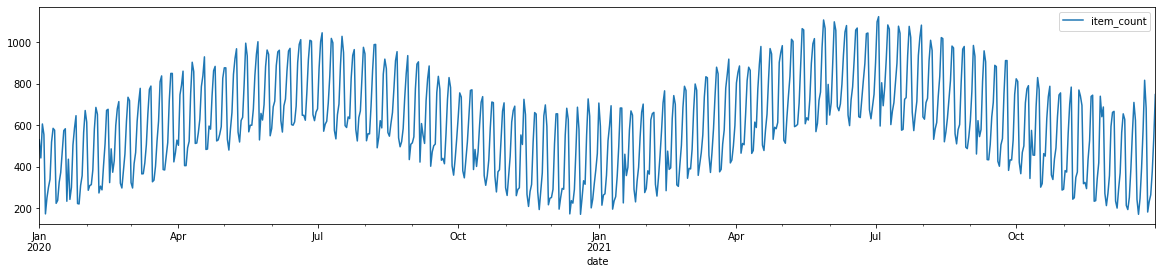

In [ ]:
import pandas as pd

#df_sales[['date','item_count']].groupby(['date']).sum().plot(kind='bar',figsize=(16,2))
df_plot = df_sales[['date','item_count']].groupby(['date']).sum().reset_index()
ax=df_plot.plot(x="date",figsize=(20,4),kind="line")

     weekday  item_count
0     Friday       88063
1     Monday       45231
2   Saturday       86954
3     Sunday       43254
4   Thursday       75329
5    Tuesday       49929
6  Wednesday       57052


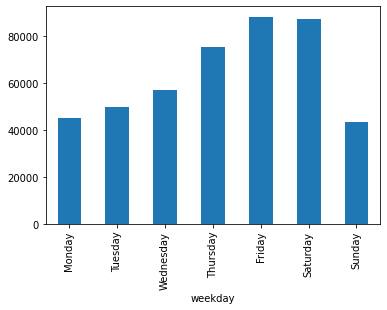

In [ ]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df_plot = df_sales[['weekday','item_count']].groupby(['weekday']).sum().reset_index()
print(df_plot)
ax = df_plot.set_index("weekday").loc[day_order].plot(kind="bar", legend=False)

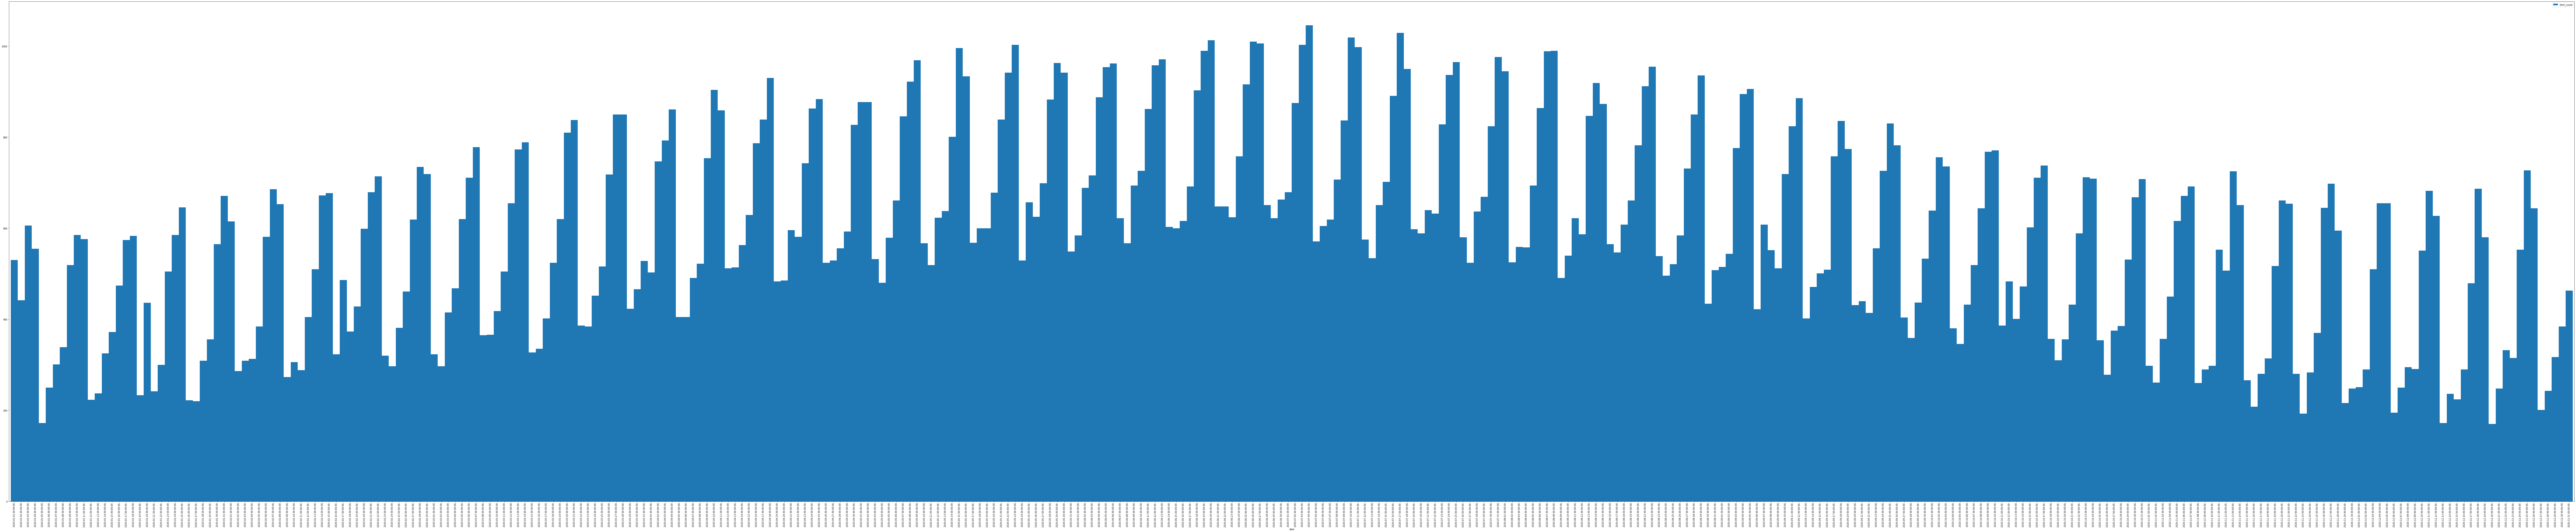

In [ ]:
df_sales_single_year = df_sales[df_sales['date'].dt.year == 2020]
df_plot = df_sales_single_year[['date','item_count']].groupby(['date']).sum().reset_index()     #.groupby([['date','item_id']]) #.sum().reset_index()
ax = df_plot.plot(x="date",figsize=(200,40),kind="bar",width=1.0)

In [ ]:
#from google.colab import files
#files.download("test.csv")

# Most Popular Items

In [ ]:
# df_sales[['date','item_count']].groupby(['date']).sum().reset_index()
df_sales.item_id.unique()

array([  3,   4,   9,  12,  13,  15,  16,  18,  19,  21,  38,  42,  44,
        45,  49,  56,  59,  67,  76,  89,  90,  50,  79,  93,  97,  23,
        71,  73,  80,  58,  95,  69,  88,  35,  29,  51,  28,  64,  14,
        26,  36,  11,  33,  92, 100,  96,  25,  85,  27,  65,  94,  22,
        60,  63,  78,  48,  66,  91,  75,  61,  81,  34,  57,  74,  17,
         8,  54,  82,  30,  62,   2,  84,  39,  70,   5,   6,  99,  55,
         1,  77,  41,  87,  46,  52,  86,  43])

In [ ]:
df2 = df_sales[['item_id','item_count']].groupby(['item_id']).sum().reset_index().sort_values('item_count',ascending=False)
df_items2 = df_items[['id','name']]
df_items2.columns = ['item_id','name']
df_popular = df2.merge(df_items2)
print(df_popular.to_string())

    item_id  item_count                                                   name
0        16      124879                                   frozen milky smoothy
1        19      106048                                                smoothy
2        38       51882                                            lamb dinner
3         9       36536                                           fruity drink
4        76       30199                                     amazing pork lunch
5        59       21628                                blue ribbon beef entree
6         4       15833                           amazing beef with bread meal
7        56       14029                            fish with vegetables dinner
8        18        9977                                             lamb lunch
9        13        9815                                sweet frozen soft drink
10       21        9725                      amazing fish with vegetables meal
11       67        3282                             

# Individual Item Plots

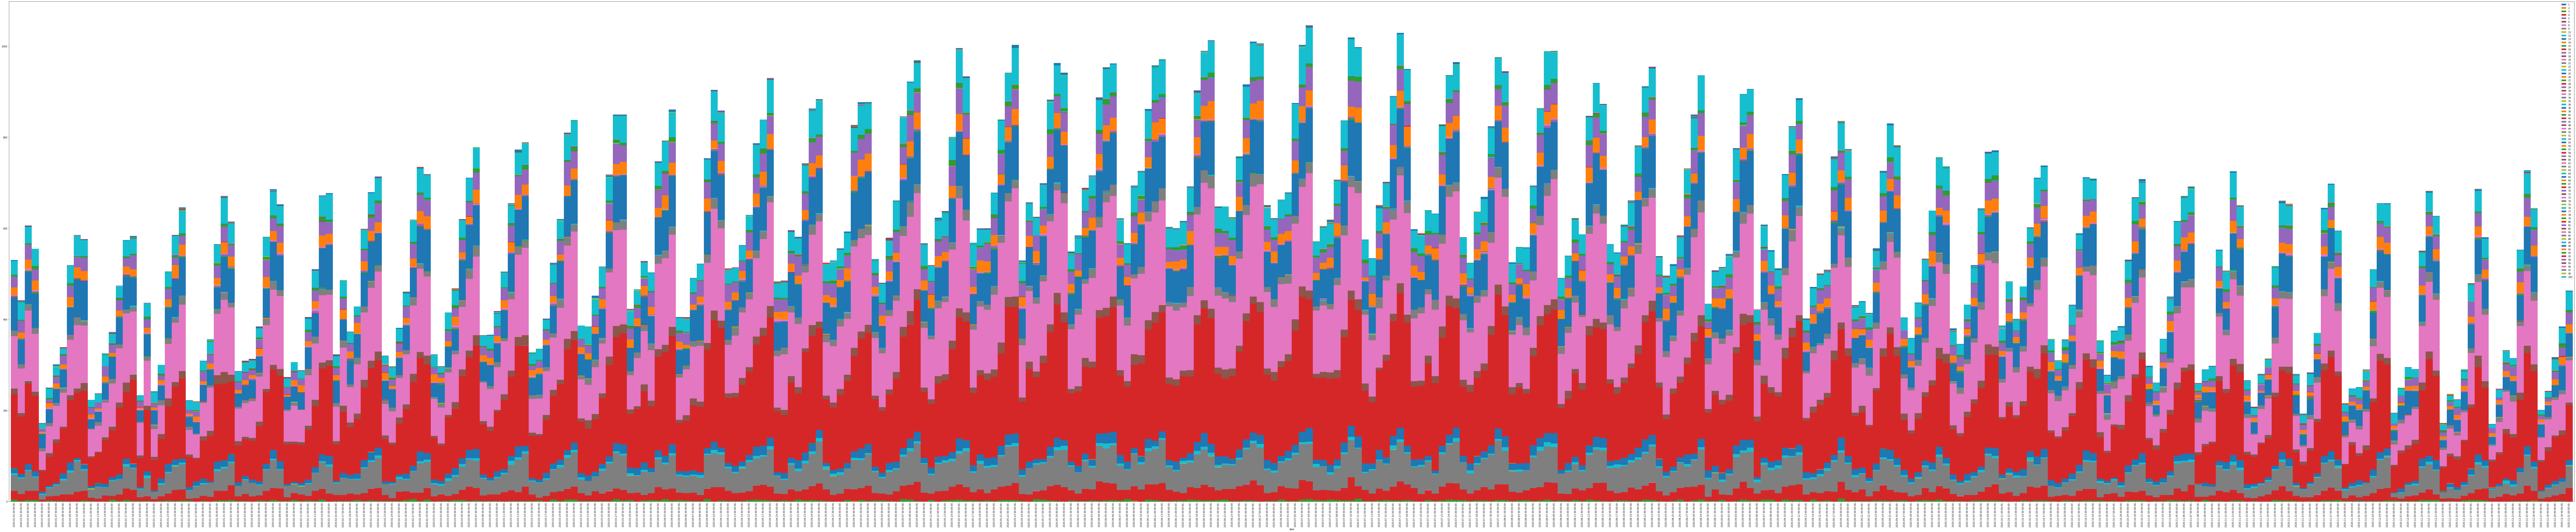

In [ ]:
df_plot = df_sales_single_year[['date','item_id','item_count']].groupby(['date','item_id']).sum().reset_index()
df_plot = df_plot.pivot(index=['date'],columns='item_id',values='item_count').reset_index()
df_plot.columns.name = None
df_plot.plot(x="date",figsize=(200,40),kind="bar",width=1.0, stacked=True)

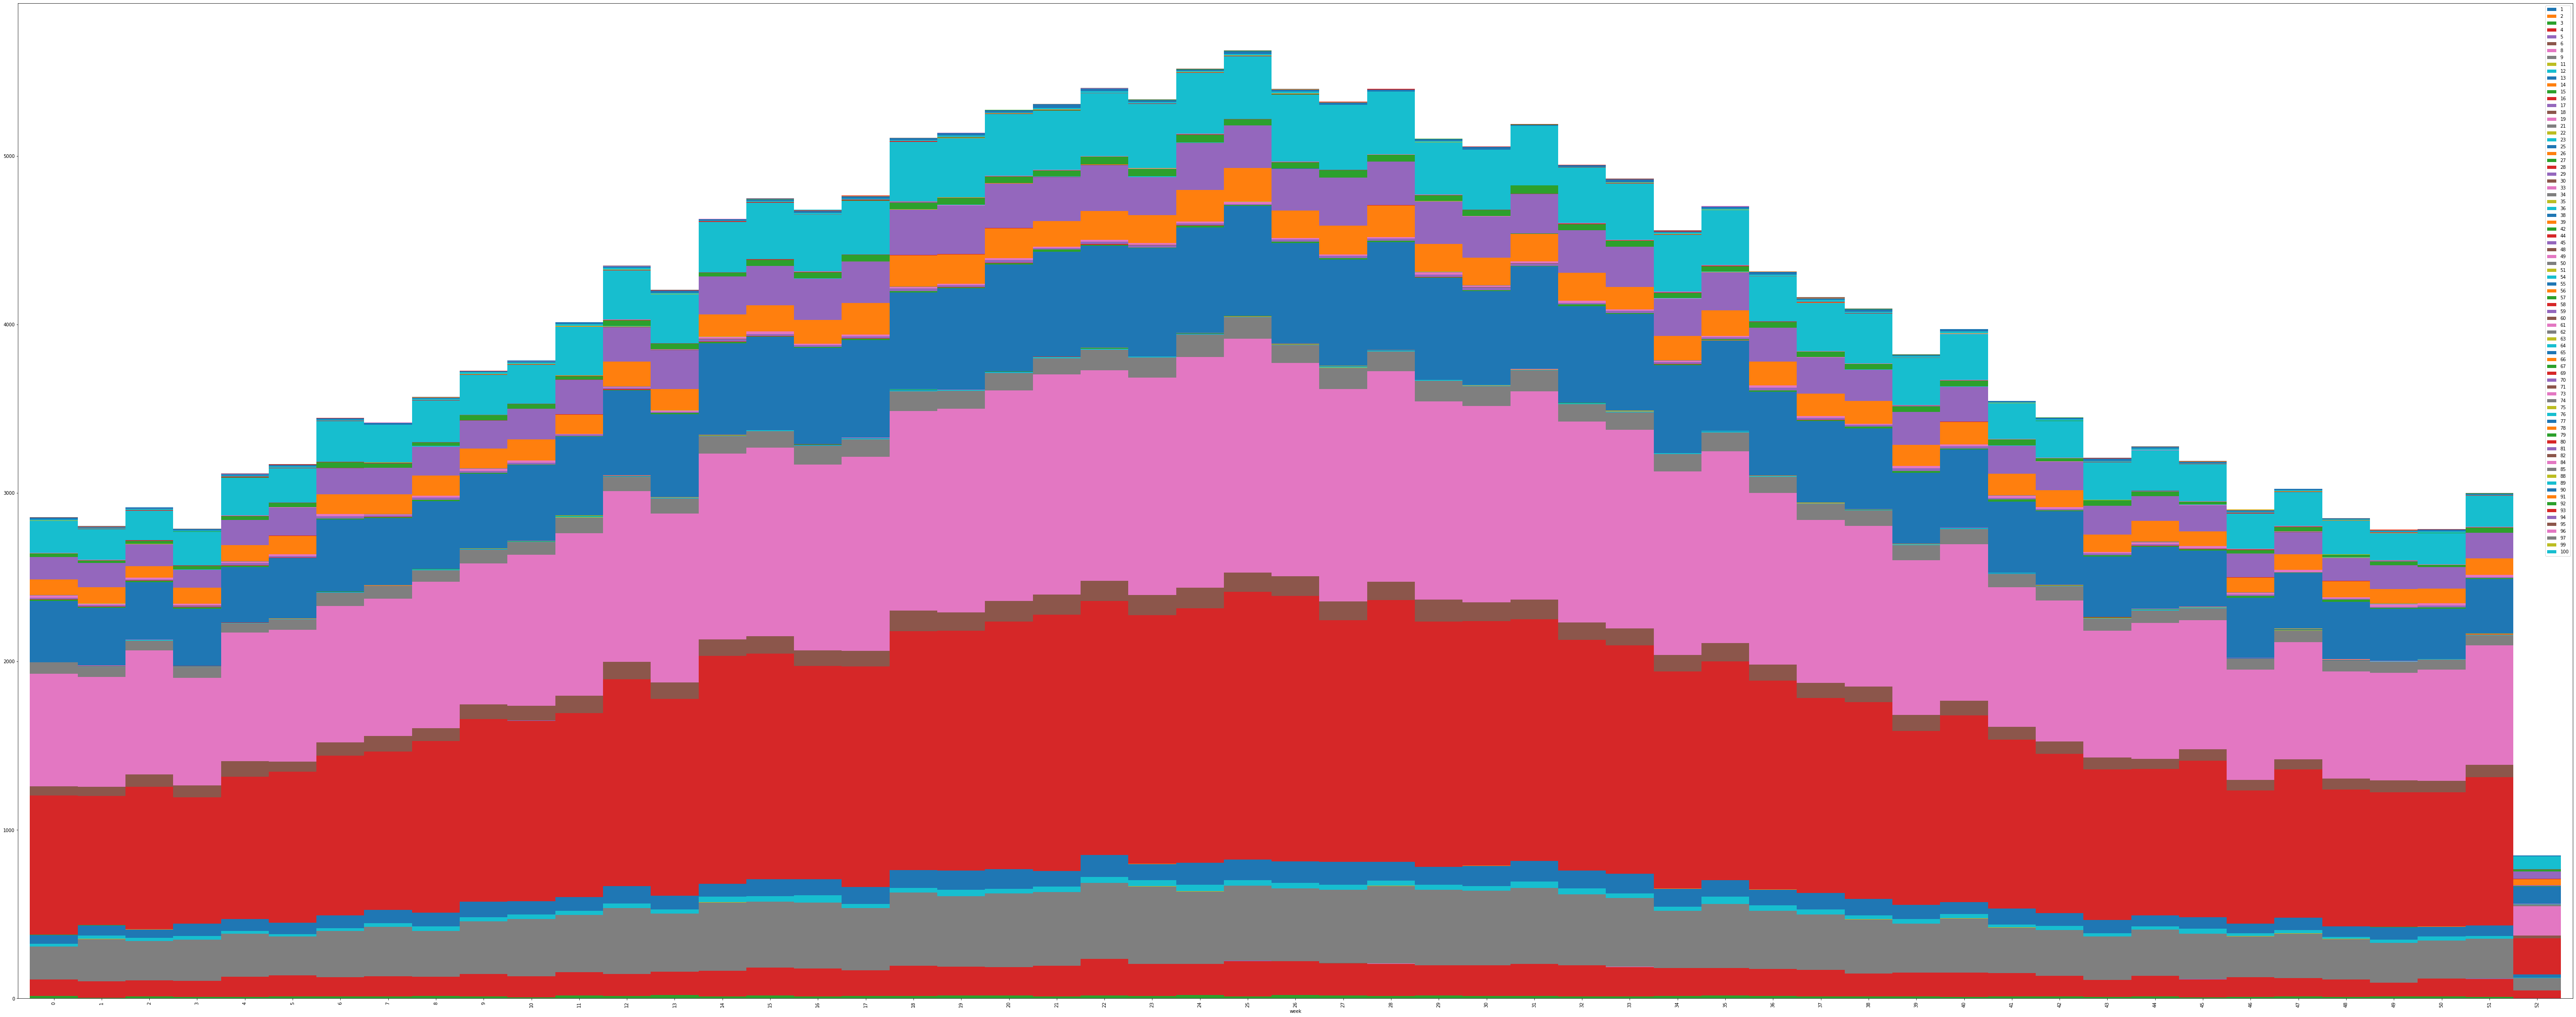

In [ ]:
df_plot = df_sales_single_year[['week','item_id','item_count']].groupby(['week','item_id']).sum().reset_index()
df_plot = df_plot.pivot(index=['week'],columns='item_id',values='item_count').reset_index()
df_plot.columns.name = None
df_plot.plot(x="week",figsize=(100,40),kind="bar",width=1.0, stacked=True)

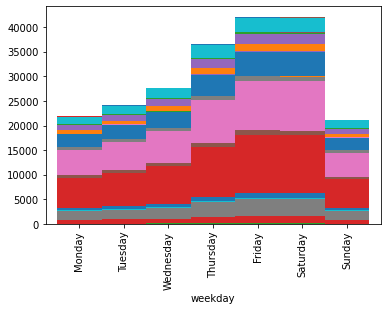

In [ ]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df_plot = df_sales_single_year[['weekday','item_id','item_count']].groupby(['weekday','item_id']).sum().reset_index()
df_plot = df_plot.pivot(index=['weekday'],columns='item_id',values='item_count').reset_index()
df_plot.columns.name = None
ax = df_plot.set_index('weekday').loc[day_order].plot(kind="bar",width=1.0, stacked=True, legend=False)

# Scratch Area

https://stackoverflow.com/questions/69724325/python-stacked-bar-plot-based-on-values-from-multiple-columns-within-the-same-d

In [ ]:
df_plot

,weekday,1,2,3,4,5,6,8,9,11,...,90,91,92,93,94,95,96,97,99,100
0,Friday,NaN,NaN,132.0,1534.0,1.0,NaN,NaN,3452.0,1.0,...,99.0,5.0,4.0,6.0,2.0,NaN,1.0,15.0,3.0,1.0
1,Monday,NaN,NaN,67.0,731.0,1.0,NaN,1.0,1806.0,4.0,...,46.0,4.0,3.0,11.0,4.0,3.0,2.0,6.0,NaN,NaN
2,Saturday,NaN,1.0,110.0,1499.0,NaN,NaN,1.0,3446.0,3.0,...,101.0,3.0,8.0,6.0,3.0,2.0,3.0,11.0,NaN,1.0
3,Sunday,NaN,NaN,61.0,761.0,2.0,NaN,NaN,1762.0,8.0,...,54.0,2.0,2.0,6.0,NaN,4.0,3.0,7.0,NaN,NaN
4,Thursday,NaN,1.0,101.0,1274.0,1.0,NaN,2.0,3032.0,3.0,...,79.0,2.0,2.0,7.0,3.0,3.0,2.0,17.0,2.0,2.0
5,Tuesday,1.0,1.0,70.0,839.0,1.0,1.0,2.0,1997.0,4.0,...,76.0,4.0,6.0,10.0,1.0,NaN,1.0,8.0,NaN,1.0
6,Wednesday,NaN,NaN,95.0,951.0,NaN,NaN,1.0,2239.0,1.0,...,67.0,3.0,2.0,12.0,1.0,1.0,NaN,8.0,NaN,NaN
